In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
sales_rel = {
    'calls': np.array([96, 40, 104, 128, 164, 76, 72, 80, 36, 84, 180, 132, 120, 44, 84]),
    'sales': np.array([41, 41, 51, 60, 61, 29, 39, 50, 28, 43, 70, 56, 45, 31, 30]),
    'names': [
        'Brian Virost', 'Carlos Ramírez', 'Carol Saia', 'Greg Fish',
        'Jeff Hall', 'Mark Reynolds', 'Meryl Rumsey', 'Mike Kiel',
        'Ray Snarsky', 'Rich Niles', 'Ron Broderick', 'Sal Spina',
        'Soni Jones', 'Susan Welch', 'Tom Keller'
    ]
}

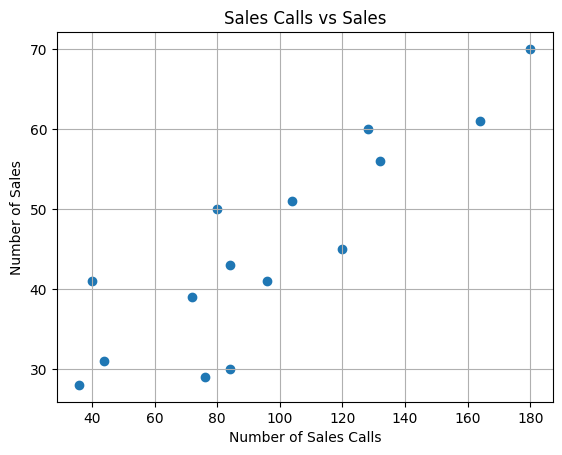

In [3]:
plt.scatter(sales_rel['calls'], sales_rel['sales'])

plt.title('Sales Calls vs Sales')
plt.xlabel('Number of Sales Calls')
plt.ylabel('Number of Sales')
plt.grid(True)

plt.show()


In [4]:
calls_mean = np.mean(sales_rel['calls'])
sales_mean = np.mean(sales_rel['sales'])

print(f"Mean number of calls: {calls_mean}")
print(f"Mean number of sales: {sales_mean}")

Mean number of calls: 96.0
Mean number of sales: 45.0


In [5]:
calls_std = pd.Series(sales_rel['calls']).std()
sales_std = pd.Series(sales_rel['sales']).std()

print(f"Standard deviation of calls: {calls_std}")
print(f"Standard deviation of sales: {sales_std}")

Standard deviation of calls: 42.7617987059879
Standard deviation of sales: 12.889641466808033


In [6]:
r = np.corrcoef(sales_rel['calls'], sales_rel['sales'])[0, 1]
print(f"Correlation coefficient: {r}")

Correlation coefficient: 0.8646317910740129


In [7]:
calls_series = pd.Series(sales_rel['calls'])
sales_series = pd.Series(sales_rel['sales'])
r_pd = calls_series.corr(sales_series)
print(f"Correlation coefficient using pandas: {r_pd}")

Correlation coefficient using pandas: 0.8646317910740129


In [8]:
dev_calls = sales_rel['calls'] - calls_mean
dev_sales = sales_rel['sales'] - sales_mean

merged_dev_calls_sales = dev_calls * dev_sales
print(f"Deviation of calls: {dev_calls}")
print(f"Deviation of sales: {dev_sales}")
print(f"Product of deviations: {merged_dev_calls_sales}")

Deviation of calls: [  0. -56.   8.  32.  68. -20. -24. -16. -60. -12.  84.  36.  24. -52.
 -12.]
Deviation of sales: [ -4.  -4.   6.  15.  16. -16.  -6.   5. -17.  -2.  25.  11.   0. -14.
 -15.]
Product of deviations: [  -0.  224.   48.  480. 1088.  320.  144.  -80. 1020.   24. 2100.  396.
    0.  728.  180.]


In [9]:
merged_sum = merged_dev_calls_sales.sum()
print(f"Sum of product of deviations: {merged_sum}")

Sum of product of deviations: 6672.0


In [10]:
r_raw = merged_sum / ((len(sales_rel['calls']) - 1) * calls_std * sales_std)
print(f"Correlation coefficient calculated manually: {r_raw}")

Correlation coefficient calculated manually: 0.8646317910740129


In [11]:

b = r * (sales_std / calls_std)
print(f"Slope of the regression line: {b}")


Slope of the regression line: 0.260625


In [12]:
a = sales_mean - b * calls_mean
print(f"Intercept of the regression line: {a}")


Intercept of the regression line: 19.98


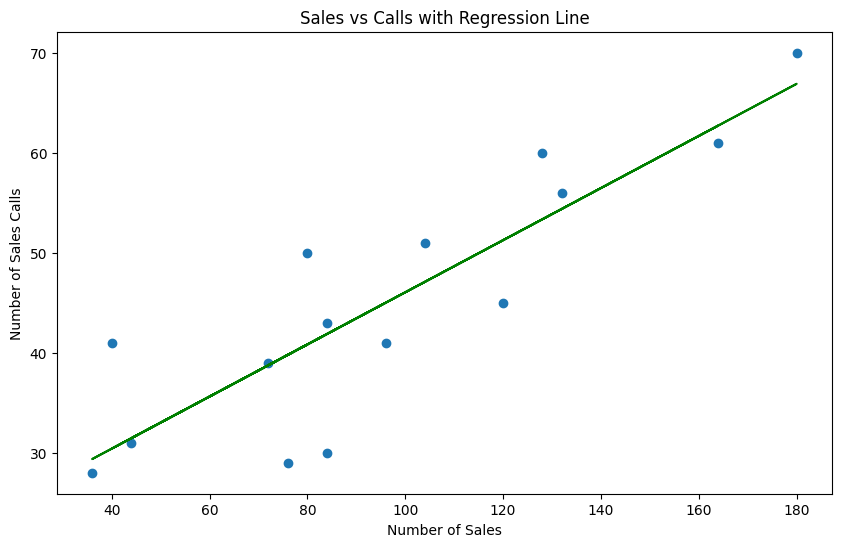

In [15]:
plt.figure(figsize=(10, 6))

plt.scatter(calls_series, sales_series)

plt.title('Sales vs Calls with Regression Line')
plt.xlabel('Number of Sales')
plt.ylabel('Number of Sales Calls')

plt.plot(calls_series, a + b * calls_series, color='green')

plt.show()


